# Kickstarter - Multi Regression

In [1]:
import pandas as pd
import numpy as np

# Modelling and evaluation libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.formula.api as smf

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read data

In [2]:
df = pd.read_csv('data/Kickstarter_cleaned.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [3]:
df.head(1)

,backers_count,blurb,country,id,name,slug,state,usd_pledged,category_name,creator_name,location_name,location_state,created_at_rd,deadline_rd,launched_at_rd,state_changed_at_rd,usd_goal,duration_days,d_pledged_goal_usd
0,47,A colorful Dia de los Muertos themed oracle de...,US,928751314,The Ofrenda Oracle Deck,the-ofrenda-oracle-deck,successful,1950.0,Playing Cards,Lisa Vollrath,Euless,TX,Wed Aug 2 16:28:13 2017,Sat Sep 9 19:00:59 2017,Thu Aug 10 19:00:59 2017,Sat Sep 9 19:00:59 2017,1000.0,30.0,950.0


## Dummy creation

In [4]:
# Create dummies
dummies = pd.get_dummies(df.state, prefix='state', drop_first=True)

# Concatinate dummies to data frame
df = pd.concat([df, dummies], axis=1)

In [5]:
df.head(1)

,backers_count,blurb,country,id,name,slug,state,usd_pledged,category_name,creator_name,location_name,location_state,created_at_rd,deadline_rd,launched_at_rd,state_changed_at_rd,usd_goal,duration_days,d_pledged_goal_usd,state_successful
0,47,A colorful Dia de los Muertos themed oracle de...,US,928751314,The Ofrenda Oracle Deck,the-ofrenda-oracle-deck,successful,1950.0,Playing Cards,Lisa Vollrath,Euless,TX,Wed Aug 2 16:28:13 2017,Sat Sep 9 19:00:59 2017,Thu Aug 10 19:00:59 2017,Sat Sep 9 19:00:59 2017,1000.0,30.0,950.0,1


In [6]:
#df.columns

## Visualisation

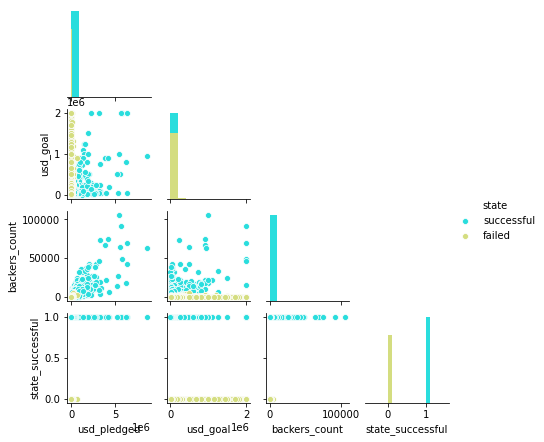

In [7]:
features = df[['usd_pledged', 'usd_goal', 'backers_count', 'state_successful', 'state']]
sns.pairplot(features, hue='state',
             diag_kind='hist', palette='rainbow',
             height=1.5, corner=True);

## Modelling & Regression

In [8]:
# Define variables
X = df[['usd_goal', 'backers_count', 'state_successful']]
y = df['usd_pledged']

In [9]:
# Splitting the model into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [10]:
# 'Training' the model
multi_lin_reg_mod = linear_model.LinearRegression()
multi_lin_reg_mod.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = multi_lin_reg_mod.predict(X_test)

In [12]:
y_pred

array([13037.70352164,  9093.65616685,  8752.62745661, ...,
        3643.34909945,  -767.78455348, -1081.93559082])

## Model Evaluation

In [13]:
smf.ols(formula='usd_pledged ~ usd_goal + backers_count + state_successful',
        data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            usd_pledged   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                 1.038e+05
Date:                Tue, 03 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:50:30   Log-Likelihood:            -2.0333e+06
No. Observations:              166192   AIC:                         4.067e+06
Df Residuals:                  166188   BIC:                         4.067e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1142.6563    190.909     -5.985      0.000   -1516.834    -768.479
usd_goal             0.0408      0.002     25.541      0.000       0.038       0.044
backers_count       74.6905      0.139    539.124      0.000      74.419      74.962
state_successful  3650.6278    251.547     14.513      0.000    3157.601    4143.654
==============================================================================
Omnibus:                   422318.013   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      27953627151.480
Skew:                          27.957   Prob(JB):                         0.00
Kurtosis:                    2011.406   Cond. No.                     1.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Optimization

R Square measures how much of variability in dependent variable can be explained by the model.
Adding the feature 'd_pledged_goal_usd' as a trial to optimize the models results leads to a R Square of 1, which is not realistic.